In [8]:
import pandas as pd
import numpy as np

data = pd.read_csv(r"D:\Fall\Data Science for PM\Assignments\Hw 1 Customer Lifetime Value\HW1 clv_transactions.csv")

In [9]:
print('Step 1: Understand the dataset')

print('1.Are there any missing values in the dataset?')
print('- No, looking at the below script results, there are no missing values in the dataset')

print(data.isnull().values.any())
print(data.isnull().sum())

Step 1: Understand the dataset
1.Are there any missing values in the dataset?
- No, looking at the below script results, there are no missing values in the dataset
False
TransactionID      0
TransactionDate    0
CustomerID         0
Amount             0
dtype: int64


In [10]:
from datetime import datetime

data['TransactionDate'] =  pd.to_datetime(data['TransactionDate'])

print('2.What is the range of dates in the dataset?')
print('- The range of dates in the dataset are given below: ')
print('Maximum date: '+ str(data['TransactionDate'].max().date()))
print('Minimum date: '+ str(data['TransactionDate'].min().date()))
print(str((data.TransactionDate.max() - data.TransactionDate.min())/np.timedelta64(1, 'D'))+' days')

2.What is the range of dates in the dataset?
- The range of dates in the dataset are given below: 
Maximum date: 2015-12-31
Minimum date: 2010-01-04
2187.0 days


In [11]:
print('3.How many unique customers are there in the dataset?') 
print('- There are '+ str(data.CustomerID.nunique())+' unique customers in the dataset')

3.How many unique customers are there in the dataset?
- There are 1000 unique customers in the dataset


In [12]:
import statistics
import numpy as np

print('4.Profile the data to give the standard descriptive statistics for the Amount field. What isthe min, max, variance, and standard deviations?')

#print(data.Amount.describe())
print('Min:'+str(data['Amount'].min()))
print('Max: '+str(data.Amount.max()))
print('Variance: '+str(statistics.variance(data['Amount'])))
print('Standard Deviation: '+ str(statistics.stdev(data['Amount'])))

4.Profile the data to give the standard descriptive statistics for the Amount field. What isthe min, max, variance, and standard deviations?
Min:-1.0
Max: 2033.0
Variance: 1499.5411107517464
Standard Deviation: 38.72390877418945


5.Do transaction amounts in general increase over time (perhaps due to inflation)?
- Looking at the below plot we can conclude that the average transaction amounts was increasing from 2010 till 2012 and then it declined from 2012 to 2015. Thereby we can conclude that it is not steadily and overall increasing overtime.


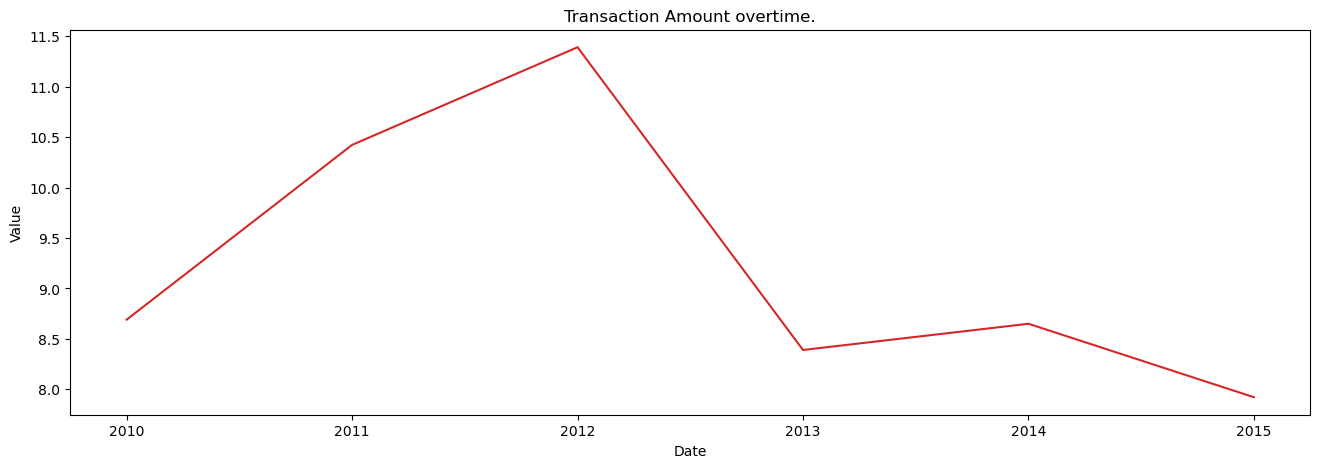

In [13]:
import matplotlib.pyplot as plt

print('5.Do transaction amounts in general increase over time (perhaps due to inflation)?')
print('- Looking at the below plot we can conclude that the average transaction amounts was increasing from 2010 till 2012 and then it declined from 2012 to 2015. Thereby we can conclude that it is not steadily and overall increasing overtime.')

def plot_df(data, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

data['year']= pd.DatetimeIndex(data['TransactionDate']).year
dataSum= data.groupby(['year']).mean()

plot_df(dataSum, x=dataSum.index, y=dataSum.Amount, title='Transaction Amount overtime.')    


In [14]:
print('Step 2: Explore the dataset')

print('1.Are there any outliers?')

print('- Looking at the max, min, mean and the inter quartile values below, we can conclude that there are negative transaction amount which cannot be possible, also there are a few values which looks like are a typing mistake as they are extremely high when compared to mean of transaction amount.')
print(data['Amount'].describe())

Step 2: Explore the dataset
1.Are there any outliers?
- Looking at the max, min, mean and the inter quartile values below, we can conclude that there are negative transaction amount which cannot be possible, also there are a few values which looks like are a typing mistake as they are extremely high when compared to mean of transaction amount.
count    4186.000000
mean        9.028082
std        38.723909
min        -1.000000
25%         3.310000
50%         6.885000
75%        11.690000
max      2033.000000
Name: Amount, dtype: float64


In [15]:
print('2.If so how would you treat them?')
print('- Since these outlier values willl impact the results and calculation outcomes it is advisable to filter them out. Post filtering the data of these outlier values. The dataset looks like below: ')

filteredData=data.query("Amount < 50 & Amount > 0 ")
print(filteredData.Amount.describe().round(2))

2.If so how would you treat them?
- Since these outlier values willl impact the results and calculation outcomes it is advisable to filter them out. Post filtering the data of these outlier values. The dataset looks like below: 
count    4181.00
mean        8.07
std         6.01
min         0.01
25%         3.31
50%         6.88
75%        11.69
max        38.35
Name: Amount, dtype: float64


In [16]:
print('Step 3: Determine origin year of customers')
print('The below dataset has acquisition date identified from which we are identifying the Origin year and Age in next cell')

import pandas

a=filteredData.groupby(['CustomerID'], sort=False, as_index=False)['TransactionDate'].min()
a.rename(columns={'TransactionDate':'AcquisitionDate'}, inplace=True)

filteredData = filteredData.merge(a[["CustomerID","AcquisitionDate"]], on="CustomerID", how="left")
print(filteredData)

Step 3: Determine origin year of customers
The below dataset has acquisition date identified from which we are identifying the Origin year and Age in next cell
      TransactionID TransactionDate  CustomerID  Amount  year AcquisitionDate
0                 1      2012-09-04           1   20.26  2012      2012-09-04
1                 2      2012-05-15           2   10.87  2012      2012-05-15
2                 3      2014-05-23           2    2.21  2014      2012-05-15
3                 4      2014-10-24           2   10.48  2014      2012-05-15
4                 5      2012-10-13           2    3.94  2012      2012-05-15
...             ...             ...         ...     ...   ...             ...
4176           4182      2013-06-23        1000    3.86  2013      2010-03-03
4177           4183      2011-08-07        1000    4.00  2011      2010-03-03
4178           4184      2012-10-07        1000   18.37  2012      2010-03-03
4179           4185      2014-01-09        1000    3.45  201

In [17]:
print('Final filtered dataset with Origin year and Age')

from datetime import datetime

filteredData['AcquisitionDate']= pd.to_datetime(filteredData['AcquisitionDate'])
filteredData['TransactionDate']= pd.to_datetime(filteredData['TransactionDate'])

filteredData['Origin Year'] = pd.DatetimeIndex(filteredData['AcquisitionDate']).year

filteredData['TransactionYear'] = pd.DatetimeIndex(filteredData['TransactionDate']).year

filteredData['Age'] = (filteredData['TransactionYear']- filteredData['Origin Year'] +1 ) * 12

filteredData['Number_of_days'] = ((filteredData.TransactionDate - filteredData.AcquisitionDate)/np.timedelta64(1, 'D'))

filteredData['Number_of_days'] = filteredData['Number_of_days'].astype(int)


filteredData['daysGroup']= filteredData['Number_of_days'] / 30.4166666667
filteredData['Origin Month'] = ((pd.DatetimeIndex(filteredData['AcquisitionDate']).year-2010)*12)

filteredData.loc[filteredData['Origin Month'] <= 0, 'Origin Month'] = 12

filteredData.sort_values(by=['CustomerID','daysGroup'])


filteredData.loc[filteredData['daysGroup'] <= 12, 'daysGroup'] = 12

filteredData.loc[(filteredData['daysGroup'] <=24) & (filteredData['daysGroup'] > 12),'daysGroup']= 24

filteredData.loc[(filteredData['daysGroup'] <=36) & (filteredData['daysGroup'] > 24),'daysGroup']= 36

filteredData.loc[(filteredData['daysGroup'] <=48) & (filteredData['daysGroup'] > 36),'daysGroup']= 48
filteredData.loc[(filteredData['daysGroup'] <=60) & (filteredData['daysGroup'] > 48),'daysGroup']= 60
filteredData.loc[(filteredData['daysGroup'] <=72) & (filteredData['daysGroup'] > 60),'daysGroup']= 72

filteredData['daysGroup'] = filteredData['daysGroup'].astype(int)


#print(filteredData)
print(filteredData[['TransactionID', 'TransactionDate','CustomerID', 'Amount','Origin Year', 'Age']])

Final filtered dataset with Origin year and Age
      TransactionID TransactionDate  CustomerID  Amount  Origin Year  Age
0                 1      2012-09-04           1   20.26         2012   12
1                 2      2012-05-15           2   10.87         2012   12
2                 3      2014-05-23           2    2.21         2012   36
3                 4      2014-10-24           2   10.48         2012   36
4                 5      2012-10-13           2    3.94         2012   12
...             ...             ...         ...     ...          ...  ...
4176           4182      2013-06-23        1000    3.86         2010   48
4177           4183      2011-08-07        1000    4.00         2010   24
4178           4184      2012-10-07        1000   18.37         2010   36
4179           4185      2014-01-09        1000    3.45         2010   60
4180           4186      2011-04-30        1000    5.18         2010   24

[4181 rows x 6 columns]


In [18]:
print('Step 4: Calculate cumulative transaction amounts')
print('Below Table shows cumulative transaction amount as per age:')

print('Amount Table:')

dateRange = ["2010-01-01 - 2010-12-31", "2011-01-01 - 2011-12-31", "2012-01-01 - 2012-12-31", "2013-01-01 - 2013-12-31", "2014-01-01 - 2014-12-31","2015-01-01 - 2015-12-31"]

yearRange = [2010,2011,2012,2013,2014,2015]

check= filteredData.groupby(['Age', 'Origin Year']).sum().groupby(level =1).cumsum()

Amount= check.pivot_table(values='Amount', index = ['Origin Year'], columns= 'Age') #.cumsum(axis=1)

Amount["Origin"] = dateRange
# .set_index(dateRange)
Amount = Amount.set_index('Origin')
Amount.columns.name = 'Origin'
Amount.index.name = None
print(Amount.fillna(""))


Step 4: Calculate cumulative transaction amounts
Below Table shows cumulative transaction amount as per age:
Amount Table:
Origin                        12       24       36       48       60       72
2010-01-01 - 2010-12-31  2259.67  3614.78  5274.81  6632.37  7930.69  8964.49
2011-01-01 - 2011-12-31  2238.46   3757.9  5465.99  6703.11  7862.24         
2012-01-01 - 2012-12-31  2181.35  3874.69  5226.86  6501.85                  
2013-01-01 - 2013-12-31  2179.85  3609.81  5227.75                           
2014-01-01 - 2014-12-31  1830.85  3262.05                                    
2015-01-01 - 2015-12-31  1912.17                                             


In [19]:
print('Step 5: Calculate cumulative transaction amounts')

print('New Customers Table:')

dateRange = ["2010-01-01 - 2010-12-31", "2011-01-01 - 2011-12-31", "2012-01-01 - 2012-12-31", "2013-01-01 - 2013-12-31", "2014-01-01 - 2014-12-31","2015-01-01 - 2015-12-31"]


res=filteredData.loc[filteredData['CustomerID'].unique(), 'Origin Year'].value_counts(sort=False)
res.columns =['Name', 'Code']

NewCustomers= filteredData.pivot_table(values='CustomerID', index = 'Origin Year',columns= 'daysGroup', aggfunc= lambda CustomerID: len(CustomerID.unique())).round(0)
#NewCustomers= filteredData.pivot_table(values='CustomerID', index = 'Origin Year', columns='Origin Month', aggfunc=pd.Series.count)
#abc= NewCustomers.reset_index()
#df[12].replace(['old value'], 'new value')
#print(NewCustomers.fillna(""))
for column in NewCustomers.columns:
    NewCustomers[column] = np.where(NewCustomers[column] > 0, NewCustomers[12], NewCustomers[column])

NewCustomers["Origin"] = dateRange
# .set_index(dateRange)
NewCustomers = NewCustomers.set_index('Origin')
print(NewCustomers.fillna(""))

Step 5: Calculate cumulative transaction amounts
New Customers Table:
daysGroup                   12     24     36     48     60     72
Origin                                                           
2010-01-01 - 2010-12-31  172.0  172.0  172.0  172.0  172.0  172.0
2011-01-01 - 2011-12-31  170.0  170.0  170.0  170.0  170.0       
2012-01-01 - 2012-12-31  163.0  163.0  163.0  163.0              
2013-01-01 - 2013-12-31  180.0  180.0  180.0                     
2014-01-01 - 2014-12-31  155.0  155.0                            
2015-01-01 - 2015-12-31  160.0                                   


In [20]:
print('Step 6: Historic CLV')

print('Historic CLV Table:')

CLTV= (Amount/ NewCustomers).round(2)
print(CLTV.fillna(""))

Step 6: Historic CLV
Historic CLV Table:
Origin                      12     24     36     48     60     72
2010-01-01 - 2010-12-31  13.14  21.02  30.67  38.56  46.11  52.12
2011-01-01 - 2011-12-31  13.17  22.11  32.15  39.43  46.25       
2012-01-01 - 2012-12-31  13.38  23.77  32.07  39.89              
2013-01-01 - 2013-12-31  12.11  20.05  29.04                     
2014-01-01 - 2014-12-31  11.81  21.05                            
2015-01-01 - 2015-12-31  11.95                                   


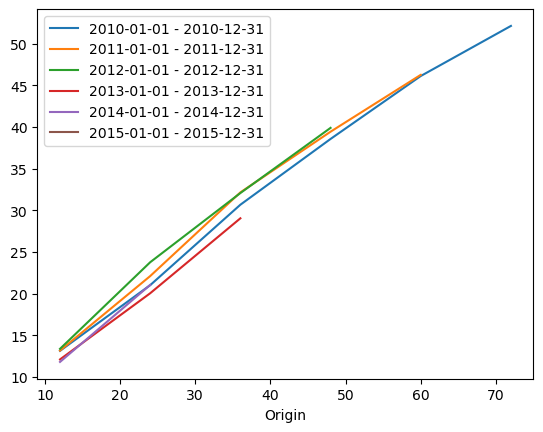

In [21]:
CLTV.transpose().plot()
plt.show()

In [22]:
print('Weighted Average of Historic CLV: ')

amountsum = Amount.sum()
newCustomerSum= NewCustomers.sum()
final = amountsum/ newCustomerSum
final = final.to_frame()
final.reset_index(inplace=True)


final=final.set_axis(['Age','Historic CLV'], axis=1).round(2)
print(final.to_string(index=False))


Weighted Average of Historic CLV: 
 Age  Historic CLV
  12         12.60
  24         21.57
  36         30.94
  48         39.28
  60         46.18
  72         52.12


In [40]:
print('Step 7: Interpreting your results')
print('\n -How much have customers acquired in 2011 spent to date?') #
print('interpretation: customers acquired in 2011 spent $'+str(final.iloc[4]['Historic CLV']*NewCustomers.iloc[1][12])+' to date')

print('\n -Do each group of customers exhibit similar or different patterns of spending? What’s theimplication for the business?')
print('interpretation: From the Historic CLV trend, we can conclude that each group of customers exhibits similar patterns of spending,  it would be more difficult for the business to target its marketing efforts effectively.\n\n a. This is because the business would not be able to differentiate between different customer groups based on their spending habits.As a result, the business would have to rely on more general marketing campaigns that may not be as effective as targeted campaigns. This could lead to wasted marketing spend and lower sales. \n\n b. The business can try to identify other factors that differentiate between different customer groups, such as their interests, demographics, or purchase history. This information can be used to target marketing campaigns more effectively. \n The business can develop loyalty programs that are based on factors other than spending, such as frequency of purchase or product reviews. This will allow the business to reward customers who are not necessarily the biggest spenders. \n\n c.The business can partner with other businesses to offer cross-promotions. This will allow the business to reach a wider audience and target customers who may not be interested in its products or services on their own. \n\n By taking these steps, the business can overcome the challenge of having customers with similar patterns of spending and improve its marketing and loyalty programs. This can lead to increased sales and profitability.')

Step 7: Interpreting your results

 -How much have customers acquired in 2011 spent to date?
interpretation: customers acquired in 2011 spent $7850.6 to date

 -Do each group of customers exhibit similar or different patterns of spending? What’s theimplication for the business?
interpretation: From the Historic CLV trend, we can conclude that each group of customers exhibits similar patterns of spending,  it would be more difficult for the business to target its marketing efforts effectively.

 a. This is because the business would not be able to differentiate between different customer groups based on their spending habits.As a result, the business would have to rely on more general marketing campaigns that may not be as effective as targeted campaigns. This could lead to wasted marketing spend and lower sales. 

 b. The business can try to identify other factors that differentiate between different customer groups, such as their interests, demographics, or purchase history. This info